# Hypothesis Testing Using Northwind Database




In this research we will use Northwind Database to test hypothesis through experimental design. We are going to take the first look at the data, and after that we'll analyze it deeper through 4 test questions.


## The Scientific Method And Experimental Design


The general structure of experimental design is as follows:

**1. Make an observation**

* Observe a phenomenon and formulate a question we want to test.

**2. Examine the research**

* Find out if there is an existing research that answers our question.
* *For the purposes of this project, we are going to skip this step.*

**3. Form a hypothesis**

* Formulate an Alternative Hypothesis (our educated guess to the test question) and a Null Hypothesis (the opposite to the Alternative Hypothesis).

**4. Conduct an experiment**

* Account for mistakes and randomness and run a well-structured experiment

**5. Analyze experimental results**

* Define if the outcomes of our experiment are statistically significant.

**6. Draw conclusions**

* Based on the findings and analysis of our experiment, either reject the Null Hypothesis or fail to reject the Null Hypothesis.

<img src='The+Scientific+Method.jpg' height=50% width=50%>


## Northwind Database

For this research, we will be using the Northwind Traders database. The database features a fictionary company, and was created in 2000 by Microsoft to demonstrate their SQL Server technology. 

<img src='Northwind_ERD_updated.png' height=100% width=100%>

## Make An Observation

To formulate our hypotheses, we first need to take a closer look into the data contained in the Northwind database and make general observations.

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats 
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session, sessionmaker
from sqlalchemy import inspect

#connect to the database and check whether the table names correspond to the picture above
engine = create_engine("sqlite:///Northwind_small.sqlite", echo=True)
Session = sessionmaker(bind=engine)
session = Session()
inspector = inspect(engine)
print(inspector.get_table_names())

2019-07-22 00:49:07,458 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-07-22 00:49:07,460 INFO sqlalchemy.engine.base.Engine ()
2019-07-22 00:49:07,462 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-07-22 00:49:07,463 INFO sqlalchemy.engine.base.Engine ()
2019-07-22 00:49:07,465 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-07-22 00:49:07,467 INFO sqlalchemy.engine.base.Engine ()
['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']


Now let's take a closer look at each table to gain a better understanding of the Northwind Traders company.

In [2]:
#find out how many employees work for the company
df = pd.read_sql_query('''SELECT * FROM Employee''', engine)
df

2019-07-22 00:49:07,481 INFO sqlalchemy.engine.base.Engine SELECT * FROM Employee
2019-07-22 00:49:07,482 INFO sqlalchemy.engine.base.Engine ()


,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp
5,6,Suyama,Michael,Sales Representative,Mr.,1995-07-02,2025-10-17,Coventry House Miner Rd.,London,British Isles,EC2 7JR,UK,(71) 555-7773,428,None,Michael is a graduate of Sussex University (MA...,5.0,http://accweb/emmployees/davolio.bmp
6,7,King,Robert,Sales Representative,Mr.,1992-05-29,2026-01-02,Edgeham Hollow Winchester Way,London,British Isles,RG1 9SP,UK,(71) 555-5598,465,None,Robert King served in the Peace Corps and trav...,5.0,http://accweb/emmployees/davolio.bmp
7,8,Callahan,Laura,Inside Sales Coordinator,Ms.,1990-01-09,2026-03-05,4726 - 11th Ave. N.E.,Seattle,North America,98105,USA,(206) 555-1189,2344,None,Laura received a BA in psychology from the Uni...,2.0,http://accweb/emmployees/davolio.bmp
8,9,Dodsworth,Anne,Sales Representative,Ms.,1998-01-27,2026-11-15,7 Houndstooth Rd.,London,British Isles,WG2 7LT,UK,(71) 555-4444,452,None,Anne has a BA degree in English from St. Lawre...,5.0,http://accweb/emmployees/davolio.bmp


In [3]:
#find out how many customers the company works with
df = pd.read_sql_query('''SELECT * FROM Customer''', engine)
df.tail()

2019-07-22 00:49:07,574 INFO sqlalchemy.engine.base.Engine SELECT * FROM Customer
2019-07-22 00:49:07,577 INFO sqlalchemy.engine.base.Engine ()


,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
86,WARTH,Wartian Herkku,Pirkko Koskitalo,Accounting Manager,Torikatu 38,Oulu,Scandinavia,90110,Finland,981-443655,981-443655
87,WELLI,Wellington Importadora,Paula Parente,Sales Manager,"Rua do Mercado, 12",Resende,South America,08737-363,Brazil,(14) 555-8122,None
88,WHITC,White Clover Markets,Karl Jablonski,Owner,305 - 14th Ave. S. Suite 3B,Seattle,North America,98128,USA,(206) 555-4112,(206) 555-4115
89,WILMK,Wilman Kala,Matti Karttunen,Owner/Marketing Assistant,Keskuskatu 45,Helsinki,Scandinavia,21240,Finland,90-224 8858,90-224 8858
90,WOLZA,Wolski Zajazd,Zbyszek Piestrzeniewicz,Owner,ul. Filtrowa 68,Warszawa,Eastern Europe,01-012,Poland,(26) 642-7012,(26) 642-7012


In [4]:
#check the number of orders the company has processed
df = pd.read_sql_query('''SELECT * FROM [Order] ORDER BY ID DESC LIMIT 5''', engine)
df

2019-07-22 00:49:07,608 INFO sqlalchemy.engine.base.Engine SELECT * FROM [Order] ORDER BY ID DESC LIMIT 5
2019-07-22 00:49:07,610 INFO sqlalchemy.engine.base.Engine ()


,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,11077,RATTC,1,2014-05-06,2014-06-03,None,2,8.53,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,North America,87110,USA
1,11076,BONAP,4,2014-05-06,2014-06-03,None,2,38.28,Bon app',"12, rue des Bouchers",Marseille,Western Europe,13008,France
2,11075,RICSU,8,2014-05-06,2014-06-03,None,2,6.19,Richter Supermarkt,Starenweg 5,Genève,Western Europe,1204,Switzerland
3,11074,SIMOB,7,2014-05-06,2014-06-03,None,2,18.44,Simons bistro,Vinbæltet 34,Kobenhavn,Northern Europe,1734,Denmark
4,11073,PERIC,2,2014-05-05,2014-06-02,None,2,24.95,Pericles Comidas clásicas,Calle Dr. Jorge Cash 321,México D.F.,Central America,05033,Mexico


In [5]:
#understand the type of goods that the company works with
df = pd.read_sql_query('''SELECT * FROM Category''', engine)
df

2019-07-22 00:49:07,659 INFO sqlalchemy.engine.base.Engine SELECT * FROM Category
2019-07-22 00:49:07,661 INFO sqlalchemy.engine.base.Engine ()


,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


In [6]:
#see what products the company operates with 
df = pd.read_sql_query('''SELECT * FROM Product''', engine)
df

2019-07-22 00:49:07,687 INFO sqlalchemy.engine.base.Engine SELECT * FROM Product
2019-07-22 00:49:07,690 INFO sqlalchemy.engine.base.Engine ()


,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1
5,6,Grandma's Boysenberry Spread,3,2,12 - 8 oz jars,25.00,120,0,25,0
6,7,Uncle Bob's Organic Dried Pears,3,7,12 - 1 lb pkgs.,30.00,15,0,10,0
7,8,Northwoods Cranberry Sauce,3,2,12 - 12 oz jars,40.00,6,0,0,0
8,9,Mishi Kobe Niku,4,6,18 - 500 g pkgs.,97.00,29,0,0,1
9,10,Ikura,4,8,12 - 200 ml jars,31.00,31,0,0,0


In [7]:
#identify the suppliers the company works with
df = pd.read_sql_query('''SELECT * FROM Supplier''', engine)
df

2019-07-22 00:49:07,752 INFO sqlalchemy.engine.base.Engine SELECT * FROM Supplier
2019-07-22 00:49:07,754 INFO sqlalchemy.engine.base.Engine ()


,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,British Isles,EC1 4SD,UK,(171) 555-2222,None,None
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,North America,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,North America,48104,USA,(313) 555-5735,(313) 555-3349,None
3,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai Musashino-shi,Tokyo,Eastern Asia,100,Japan,(03) 3555-5011,None,None
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Southern Europe,33007,Spain,(98) 598 76 54,None,None
5,6,Mayumi's,Mayumi Ohno,Marketing Representative,92 Setsuko Chuo-ku,Osaka,Eastern Asia,545,Japan,(06) 431-7877,None,Mayumi's (on the World Wide Web)#http://www.mi...
6,7,"Pavlova, Ltd.",Ian Devling,Marketing Manager,74 Rose St. Moonie Ponds,Melbourne,Victoria,3058,Australia,(03) 444-2343,(03) 444-6588,None
7,8,"Specialty Biscuits, Ltd.",Peter Wilson,Sales Representative,29 King's Way,Manchester,British Isles,M14 GSD,UK,(161) 555-4448,None,None
8,9,PB Knäckebröd AB,Lars Peterson,Sales Agent,Kaloadagatan 13,Göteborg,Northern Europe,S-345 67,Sweden,031-987 65 43,031-987 65 91,None
9,10,Refrescos Americanas LTDA,Carlos Diaz,Marketing Manager,Av. das Americanas 12.890,Sao Paulo,South America,5442,Brazil,(11) 555 4640,None,None


In [8]:
#check how many shippers the company has
df = pd.read_sql_query('''SELECT * FROM Shipper''', engine)
df

2019-07-22 00:49:07,797 INFO sqlalchemy.engine.base.Engine SELECT * FROM Shipper
2019-07-22 00:49:07,798 INFO sqlalchemy.engine.base.Engine ()


,Id,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


In [9]:
#determine if the company offers any discounts
df = pd.read_sql_query('''SELECT DISTINCT Discount FROM OrderDetail''', engine)
df

2019-07-22 00:49:07,821 INFO sqlalchemy.engine.base.Engine SELECT DISTINCT Discount FROM OrderDetail
2019-07-22 00:49:07,823 INFO sqlalchemy.engine.base.Engine ()


,Discount
0,0.00
1,0.15
2,0.05
3,0.20
4,0.25
5,0.10
6,0.02
7,0.03
8,0.04
9,0.06


#### Findings:

* Northwind Traders is a company that employs 9 people in the US and UK.
* They offer 77 food products in 8 categories.
* The company works with 29 suppliers worldwide and ships to 88 customers worldwide using the services of 3 shipper companies.
* Northwind Traders processed 11,077 orders.
* They offer 10 discount categories.

## Form A Hypothesis

Based on the observations of the Northwind Traders database, we will perform 4 tests to answer the questions and validate the following hypotheses:

**Test 1**

Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?

> $H_{0}$: *Discount amount does not have a statistically significant effect on the quantity of a product in an order.* 

> $H_{1}$: *Discount amount has a statistically significant effect on the quantity of a product in an order.*

**Test 2**

Are the shopping patterns gender-related? Do women spend more money than men?

> $H_{0}$: *There is no difference between male and female shopping patterns.* 

> $H_{1}$: *Male customers spend more money than female customers.*

**Test 3**

Is it more profitable for the company to sell to domestic or international customers?

> $H_{0}$: *There is no difference between the amount of revenue obtained from domestic and international customers.* 

> $H_{1}$: *Domestic customers bring more revenue to the company than international customers.*

**Test 4**

Is it more profitable for the company to work with domestic or international suppliers?

> $H_{0}$: *There is no difference in profitability between domestic and international suppliers.* 

> $H_{1}$: *Working with international suppliers is more profitable for the company than working with domestic suppliers.*

## Conduct Experiments And Analyze Experimental Results

### Test 1

#### 1. Question

Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?

#### 2. Initial Observations

In [10]:
#review the table that contains order discount
df1 = pd.read_sql_query('''SELECT * FROM OrderDetail''', engine)
print('\nTable info')
df1.info()
print('\nSample data')
df1.head()

2019-07-22 00:49:07,840 INFO sqlalchemy.engine.base.Engine SELECT * FROM OrderDetail
2019-07-22 00:49:07,843 INFO sqlalchemy.engine.base.Engine ()

Table info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 6 columns):
Id           2155 non-null object
OrderId      2155 non-null int64
ProductId    2155 non-null int64
UnitPrice    2155 non-null float64
Quantity     2155 non-null int64
Discount     2155 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 101.1+ KB

Sample data


,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.0
1,10248/42,10248,42,9.8,10,0.0
2,10248/72,10248,72,34.8,5,0.0
3,10249/14,10249,14,18.6,9,0.0
4,10249/51,10249,51,42.4,40,0.0


In [11]:
#add NetPrice column
df1['GrossPrice'] = np.multiply(df1['Quantity'],df1['UnitPrice'])
df1['NetPrice'] = np.multiply(df1['GrossPrice'],df1['Discount'])
df1['NetPrice'] = np.subtract(df1['GrossPrice'],df1['NetPrice'])
df1.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,GrossPrice,NetPrice
0,10248/11,10248,11,14.0,12,0.0,168.0,168.0
1,10248/42,10248,42,9.8,10,0.0,98.0,98.0
2,10248/72,10248,72,34.8,5,0.0,174.0,174.0
3,10249/14,10249,14,18.6,9,0.0,167.4,167.4
4,10249/51,10249,51,42.4,40,0.0,1696.0,1696.0


In [12]:
#find out how many products were sold at what discount
df1.Discount.value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
0.03       3
0.02       2
0.01       1
0.04       1
0.06       1
Name: Discount, dtype: int64

Since 1%, 2%, 3%, 4% and 6% discount only occurred in 8 cases, we'll drop those rows and continue working with products sold at no discount or at a discount of 5%, 10%, 15%, 20%, and 25%.

In [13]:
#drop the lines with rarely occurring discount
df1_test = df1.drop(df1[(df1['Discount'] == 0.01) | (df1['Discount'] == 0.02) | (df1['Discount'] == 0.03) | (df1['Discount'] == 0.04) | (df1['Discount'] == 0.06)].index)
df1_test.Discount.value_counts()

0.00    1317
0.05     185
0.10     173
0.20     161
0.15     157
0.25     154
Name: Discount, dtype: int64

Now, we'll visualize our data to get a better understanding of the distributions. 

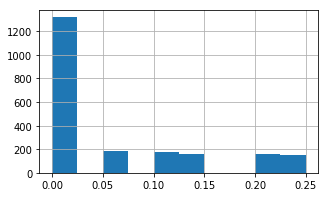

In [14]:
#plot a histogram
df1_test.Discount.hist(figsize=(5,3))

Most of the orders were sold at no discount. The distribution among the 5 discount levels looks to be pretty even.

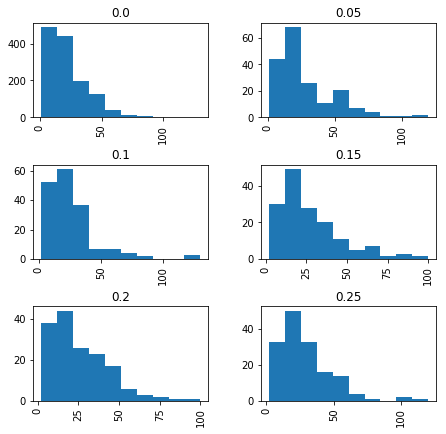

In [15]:
#plot 6 histograms based on the discount level
df1_test.hist('Quantity', by = 'Discount', figsize=(7,7));

From the histograms above, we can see that the data is not normally distributed, and in all cases the data is skewed right.

Let's take a closer look at the distribution of unit quantity and average spend based on the 5 discount levels.

In [16]:
#drop the lines containing units sold at full price
df1_discount = df1_test.drop(df1_test[(df1_test['Discount'] == 0.00)].index)
df1_discount.Discount.value_counts()

0.05    185
0.10    173
0.20    161
0.15    157
0.25    154
Name: Discount, dtype: int64

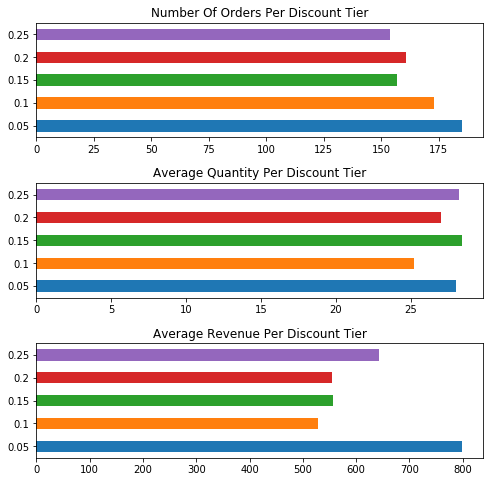

In [17]:
#plot the number of orders, average quantity and average revenue per order based on the discount tier
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8,8))
df1_discount.groupby(['Discount'])['Discount'].count().plot(kind='barh', ax=ax1)
df1_discount.groupby(['Discount'])['Quantity'].mean().plot(kind='barh', ax=ax2)
df1_discount.groupby(['Discount'])['NetPrice'].mean().plot(kind='barh', ax=ax3)
ax1.set_title('Number Of Orders Per Discount Tier')
ax1.set_ylabel('')
ax2.set_title('Average Quantity Per Discount Tier')
ax2.set_ylabel('')
ax3.set_title('Average Revenue Per Discount Tier')
ax3.set_ylabel('')
fig.subplots_adjust(hspace=0.4);

#### Observations:
* The most popular discount is 5%. Over 175 orders were made with the 5% discount.
* 5%, 15%, and 25% bring about the same unit quantity to the company.
* Out of the 5 discount tiers reviewed, a 5% discount brought the company the most revenue.

#### 3. Hypothesis

> $H_{0}$: *There is no difference between male and female shopping patterns.* 

> $H_{a}$: *Male customers spend more money than female customers.*

> $\alpha$ *= 0.05*

#### 4. Statistical Analysis

As we have 5 discount tiers, we'll proceed with selecting ANOVA test, because it explains the total variance as combination of variances from different groups. The F-distribution will become our test statistic. We set our significance level at 0.05, so we reject the null hypothesis if $F>F_\alpha$.

/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


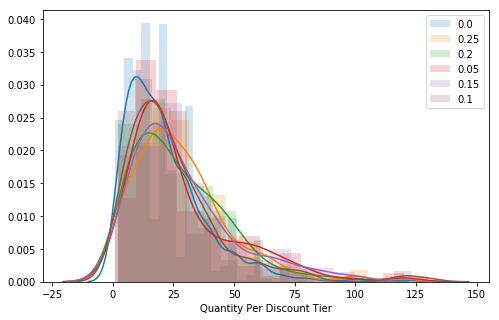

In [18]:
#plot the distributions
plt.figure(figsize=(8,5))
for discount in set(df1_test.Discount):
    discount_group = df1_test.loc[df1_test['Discount'] == discount]
    sns.distplot(discount_group['Quantity'], hist_kws=dict(alpha=0.2), label=discount)
    plt.legend()
    plt.xlabel('Quantity Per Discount Tier')

In [19]:
#define ANOVA model
formula = 'Quantity ~ C(Discount)'
lm = ols(formula, df1_test).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                    sum_sq      df         F        PR(>F)
C(Discount)   17348.854662     5.0  9.798709  2.840681e-09
Residual     758138.565924  2141.0       NaN           NaN


Since our F value is higher than our alpha value, we can reject the null hypothesis. 

#### 5. Conclusions

When answering our research question, we found out that there is a statistically significant effect of the discount level on the quantity of a product in an order based on analysis of variance. The data shows that the 5% discount is the best way to move forward, because this discount tier was used for the most orders, sells the highest number of units, and brings the most revenue to the company.

### Test 2

#### 1. Question 

Is the amount of money spent by customers gender-related? Do women or men spend more money?

#### 2. Initial Observations

In [53]:
#obtain the data needed to answer the question by joining Customer, Order and OrderDetail tables
df2 = pd.read_sql_query('''SELECT c.ID AS CustomerID, c.ContactName, o.ID AS OrderID, od.UnitPrice, od.Quantity, od.Discount
                            FROM OrderDetail od
                            JOIN [Order] o ON od.OrderID = o.ID
                            JOIN Customer c ON o.CustomerID = c.ID
                            ''', engine)
print('\nTable info')
df2.info()
print('\nSample data')
df2.head()

2019-07-22 01:43:22,901 INFO sqlalchemy.engine.base.Engine SELECT c.ID AS CustomerID, c.ContactName, o.ID AS OrderID, od.UnitPrice, od.Quantity, od.Discount
                            FROM OrderDetail od
                            JOIN [Order] o ON od.OrderID = o.ID
                            JOIN Customer c ON o.CustomerID = c.ID
                            
2019-07-22 01:43:22,904 INFO sqlalchemy.engine.base.Engine ()

Table info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078 entries, 0 to 2077
Data columns (total 6 columns):
CustomerID     2078 non-null object
ContactName    2078 non-null object
OrderID        2078 non-null int64
UnitPrice      2078 non-null float64
Quantity       2078 non-null int64
Discount       2078 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 97.5+ KB

Sample data


,CustomerID,ContactName,OrderID,UnitPrice,Quantity,Discount
0,VINET,Paul Henriot,10248,14.0,12,0.0
1,VINET,Paul Henriot,10248,9.8,10,0.0
2,VINET,Paul Henriot,10248,34.8,5,0.0
3,TOMSP,Karin Josephs,10249,18.6,9,0.0
4,TOMSP,Karin Josephs,10249,42.4,40,0.0


In [21]:
#pull customer names to divide them by gender in the next step
df2.ContactName.unique()

array(['Paul Henriot', 'Karin Josephs', 'Mario Pontes', 'Mary Saveley',
       'Pascale Cartrain', 'Yang Wang', 'Michael Holz', 'Paula Parente',
       'Carlos Hernández', 'Roland Mendel', 'Francisco Chang',
       'Henriette Pfalzheim', 'Bernardo Batista', 'Paula Wilson',
       'Maria Larsson', 'Frédérique Citeaux', 'Pirkko Koskitalo',
       'Peter Franken', 'Manuel Pereira', 'Karl Jablonski',
       'Art Braunschweiger', 'Horst Kloss', 'Giovanni Rovelli',
       'Miguel Angel Paolino', 'Alexander Feuer', 'Christina Berglund',
       'Renate Messner', 'Alejandra Camino', 'Carlos González',
       'Janete Limeira', 'Maurizio Moroni', 'Victoria Ashworth',
       'Pedro Afonso', 'Anabela Domingues', 'Patricia McKenna',
       'Rita Müller', 'José Pedro Freyre', 'Rene Phillips', 'Fran Wilson',
       'Ana Trujillo', 'Liz Nixon', 'Helen Bennett',
       'Guillermo Fernández', 'Philip Cramer', 'Jose Pavarotti',
       'Martín Sommer', 'Lino Rodriguez', 'Laurence Lebihan',
       'Jean Fre

In [22]:
#add a gender column
females = ['Karin Josephs','Mary Saveley','Paula Parente','Henriette Pfalzheim',
          'Paula Wilson','Maria Larsson','Christina Berglund','Renate Messner', 
           'Alejandra Camino','Janete Limeira','Victoria Ashworth','Anabela Domingues', 
           'Patricia McKenna','Rita Müller','Ana Trujillo', 'Liz Nixon', 'Helen Bennett',
          'Isabel de Castro', 'Jytte Petersen','Aria Cruz', 'Annette Roulet',
          'Ann Devon','Elizabeth Lincoln','Martine Rancé','Elizabeth Brown',
          'Hanna Moos','Catherine Dewey']
df2['Gender'] = np.where(df2['ContactName'].isin(females), 'female', 'male')
df2.head()

,CustomerID,ContactName,OrderID,UnitPrice,Quantity,Discount,Gender
0,VINET,Paul Henriot,10248,14.0,12,0.0,male
1,VINET,Paul Henriot,10248,9.8,10,0.0,male
2,VINET,Paul Henriot,10248,34.8,5,0.0,male
3,TOMSP,Karin Josephs,10249,18.6,9,0.0,female
4,TOMSP,Karin Josephs,10249,42.4,40,0.0,female


In [23]:
#add NetPrice column
df2['GrossPrice'] = np.multiply(df2['Quantity'],df2['UnitPrice'])
df2['NetPrice'] = np.multiply(df2['GrossPrice'],df2['Discount'])
df2['NetPrice'] = np.subtract(df2['GrossPrice'],df2['NetPrice'])
df2.head()

,CustomerID,ContactName,OrderID,UnitPrice,Quantity,Discount,Gender,GrossPrice,NetPrice
0,VINET,Paul Henriot,10248,14.0,12,0.0,male,168.0,168.0
1,VINET,Paul Henriot,10248,9.8,10,0.0,male,98.0,98.0
2,VINET,Paul Henriot,10248,34.8,5,0.0,male,174.0,174.0
3,TOMSP,Karin Josephs,10249,18.6,9,0.0,female,167.4,167.4
4,TOMSP,Karin Josephs,10249,42.4,40,0.0,female,1696.0,1696.0


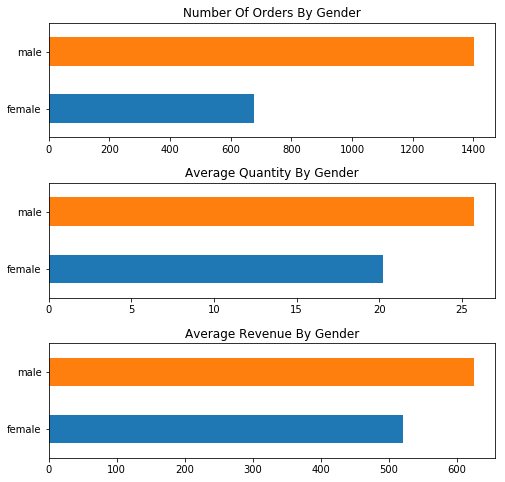

In [24]:
#plot the number of orders, average quantity and average revenue per order by gender
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8,8))
df2.groupby(['Gender'])['Gender'].count().plot(kind='barh', ax=ax1)
df2.groupby(['Gender'])['Quantity'].mean().plot(kind='barh', ax=ax2)
df2.groupby(['Gender'])['NetPrice'].mean().plot(kind='barh', ax=ax3)
ax1.set_title('Number Of Orders By Gender')
ax1.set_ylabel('')
ax2.set_title('Average Quantity By Gender')
ax2.set_ylabel('')
ax3.set_title('Average Revenue By Gender')
ax3.set_ylabel('')
fig.subplots_adjust(hspace=0.4);

#### Observations:
* Men make more orders.
* Male customers purcharse larger unit quantities per.
* Male customers tend to spend more money.

Based on the observations, we'll split our dataframe into 2 on the basis of gender to take a closer look at the data.

In [25]:
#create a dataframe for males and get the 5 point statistics
df2_male = df2.loc[df2['Gender'] == 'male']
df2_male.describe()

,OrderID,UnitPrice,Quantity,Discount,GrossPrice,NetPrice
count,1402.000000,1402.000000,1402.000000,1402.000000,1402.000000,1402.000000
mean,10663.552782,26.605136,25.711840,0.052211,666.563395,624.847798
std,237.369117,31.427471,20.761993,0.079448,1074.097228,1005.617736
min,10248.000000,2.000000,1.000000,0.000000,12.500000,12.500000
25%,10461.000000,12.000000,10.000000,0.000000,172.800000,162.187500
50%,10674.000000,18.400000,20.000000,0.000000,380.000000,368.062500
75%,10861.000000,32.800000,35.000000,0.100000,760.000000,720.000000
max,11076.000000,263.500000,130.000000,0.250000,15810.000000,15810.000000


In [26]:
#create a dataframe for females and get the 5 point statistics
df2_female = df2.loc[df2['Gender'] == 'female']
df2_female.describe()

,OrderID,UnitPrice,Quantity,Discount,GrossPrice,NetPrice
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,10647.640533,25.597737,20.217456,0.063964,557.868580,520.619604
std,252.270054,26.678301,14.611261,0.090660,953.217572,906.215718
min,10249.000000,2.000000,1.000000,0.000000,4.800000,4.800000
25%,10431.000000,12.000000,10.000000,0.000000,125.700000,116.700000
50%,10622.000000,19.000000,18.000000,0.000000,310.600000,289.900000
75%,10857.000000,31.230000,30.000000,0.100000,625.800000,576.900000
max,11077.000000,263.500000,80.000000,0.250000,10540.000000,10540.000000


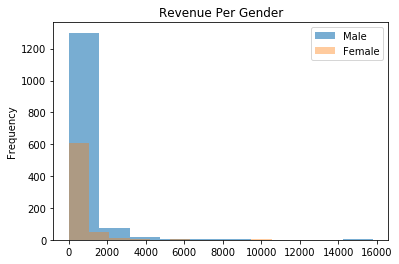

In [27]:
#plot net price by money spent based on gender 
plt.figure(figsize=(6,4))
df2_male['NetPrice'].plot(kind='hist', alpha=0.6, legend=True, label='Male')
df2_female['NetPrice'].plot(kind='hist',  alpha=0.4, legend=True, label='Female')
plt.title('Revenue Per Gender');

/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


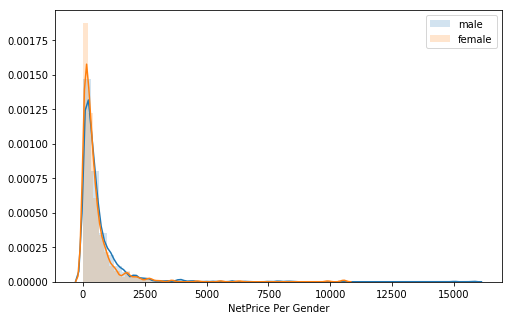

In [28]:
#plot the distributions 
plt.figure(figsize=(8,5))
for gender in set(df2.Gender):
    gender_group = df2.loc[df2['Gender'] == gender]
    sns.distplot(gender_group['NetPrice'], hist_kws=dict(alpha=0.2), label=gender)
    plt.legend()
    plt.xlabel('NetPrice Per Gender')

#### 3. Hypothesis:

> $H_{0}$: *There is no difference between male and female shopping patterns.* 

> $H_{a}$: *Male customers bring more revenue.*

> $\alpha$ *= 0.05*


#### 4. Statistical Analysis

As we are going to compare 2 gender groups to learn how they are different from each other, it is best to use a one sample t-test. Some assumptions of this test are that:
* data is independent, i.e. one observation does not influence or affect the other observations
* data is collected randomly, i.e. each data point has an equal chance of being included in the sample
* data is approximately normally distributed, i.e. the sampling distribution of the mean is normal

Although, there is skewness in our data, we'll proceed with the t-test, but we'll keep in mind that it delivers the most reliable results when performed on normally distributed data.

In [29]:
#write a function for one-sample t-test
def one_sample_ttest(sample, popmean, alpha):

    # Visualize sample distribution for normality 
    sns.set(color_codes=True)
    sns.set(rc={'figure.figsize':(12,10)})
    sns.distplot(sample)
    
    # Populaqtion mean 
    mu = popmean
    
    # Sample mean (x̄) using NumPy mean()
    x_bar= sample.mean()

    # Sample Stadrad Deviation (sigma) using Numpy
    sigma = np.std(sample)
    
    # Degrees of freedom
    df = len(sample) - 1
    
    #Calculate the critical t-value
    t_crit = stats.t.ppf(1 - alpha, df=df)
    
    #Calculate the t-value and p-value
    results = stats.ttest_1samp(a= sample, popmean= mu)         
    
    if (results[0]>t_crit) and (results[1]<alpha):
        print ("Null hypothesis rejected. Results are statistically significant with t-value =", 
                round(results[0], 2), "critical t-value =", t_crit, "and p-value =", np.round((results[1]), 10))
    else:
        print ("Null hypothesis is True with t-value =", 
                round(results[0], 2), ", critical t-value =", t_crit, "and p-value =", np.round((results[1]), 10))
    

/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Null hypothesis rejected. Results are statistically significant with t-value = 3.88 critical t-value = 1.6459419805240438 and p-value = 0.0001089312


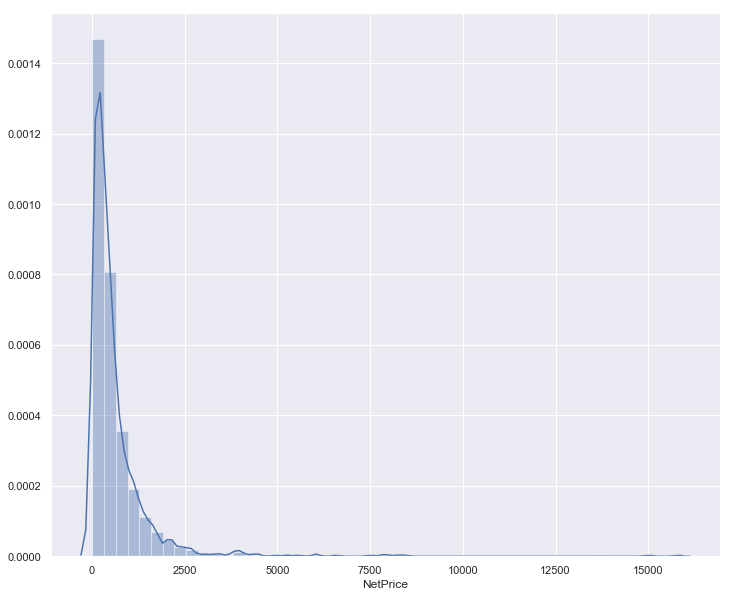

In [30]:
#run one-sample t-test
sample2 = df2_male.NetPrice
popmean2 = df2_female.NetPrice.mean()
alpha = 0.05
one_sample_ttest(sample2, popmean2, alpha)

We've proven that the alternative hypothesis is statistically significant, but now we need to understand the effect size, i.e. how different the sample means are. For this purpose, we'll use Cohen's D which defines the magnitude of differences between two or more groups on a given variable, and is calculated as 
> **$d$ = effect size (difference of means) / pooled standard deviation**

In [31]:
#write a function for Cohen's D
def Cohen_d(group1, group2):

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    return d

In [32]:
#find Cohen's D for our case
males = df2_male.NetPrice
females = df2_female.NetPrice
Cohen_d(males, females)

0.10696714636059383

Based on the results of Cohen's D, we conclude that the effect size is small.

#### 5. Conclusions

There is a difference between male and female shopping patterns. Although the effect size is small, we rejected the null hypothesis and proved that men spend more money on their orders. The company should focus on male customers because they also make more orders and purchase more units per order than women.

### Test 3

#### 1. Question

Is it more profitable for the company to sell to domestic or international customers?

#### 2. Initial Observations

In [33]:
#obtain the data needed to answer the question by joining Customer, Order and OrderDetail tables
df3 = pd.read_sql_query('''SELECT c.ID AS CustomerID, c.Region, o.ID AS OrderID, od.UnitPrice, od.Quantity, od.Discount
                            FROM OrderDetail od
                            JOIN [Order] o ON od.OrderID = o.ID
                            JOIN Customer c ON o.CustomerID = c.ID
                            ''', engine)
print('\nTable info')
df3.info()
print('\nSample data')
df3.head()

2019-07-22 00:49:11,897 INFO sqlalchemy.engine.base.Engine SELECT c.ID AS CustomerID, c.Region, o.ID AS OrderID, od.UnitPrice, od.Quantity, od.Discount
                            FROM OrderDetail od
                            JOIN [Order] o ON od.OrderID = o.ID
                            JOIN Customer c ON o.CustomerID = c.ID
                            
2019-07-22 00:49:11,900 INFO sqlalchemy.engine.base.Engine ()

Table info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2078 entries, 0 to 2077
Data columns (total 6 columns):
CustomerID    2078 non-null object
Region        2078 non-null object
OrderID       2078 non-null int64
UnitPrice     2078 non-null float64
Quantity      2078 non-null int64
Discount      2078 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 97.5+ KB

Sample data


,CustomerID,Region,OrderID,UnitPrice,Quantity,Discount
0,VINET,Western Europe,10248,14.0,12,0.0
1,VINET,Western Europe,10248,9.8,10,0.0
2,VINET,Western Europe,10248,34.8,5,0.0
3,TOMSP,Western Europe,10249,18.6,9,0.0
4,TOMSP,Western Europe,10249,42.4,40,0.0


In [34]:
#add a location column
domestic = ['North America']
df3['Location'] = np.where(df3['Region'].isin(domestic), 'domestic', 'international')
df3.head()

,CustomerID,Region,OrderID,UnitPrice,Quantity,Discount,Location
0,VINET,Western Europe,10248,14.0,12,0.0,international
1,VINET,Western Europe,10248,9.8,10,0.0,international
2,VINET,Western Europe,10248,34.8,5,0.0,international
3,TOMSP,Western Europe,10249,18.6,9,0.0,international
4,TOMSP,Western Europe,10249,42.4,40,0.0,international


In [35]:
#add NetPrice column
df3['GrossPrice'] = np.multiply(df3['Quantity'],df3['UnitPrice'])
df3['NetPrice'] = np.multiply(df3['GrossPrice'],df3['Discount'])
df3['NetPrice'] = np.subtract(df3['GrossPrice'],df3['NetPrice'])
df3.head()

,CustomerID,Region,OrderID,UnitPrice,Quantity,Discount,Location,GrossPrice,NetPrice
0,VINET,Western Europe,10248,14.0,12,0.0,international,168.0,168.0
1,VINET,Western Europe,10248,9.8,10,0.0,international,98.0,98.0
2,VINET,Western Europe,10248,34.8,5,0.0,international,174.0,174.0
3,TOMSP,Western Europe,10249,18.6,9,0.0,international,167.4,167.4
4,TOMSP,Western Europe,10249,42.4,40,0.0,international,1696.0,1696.0


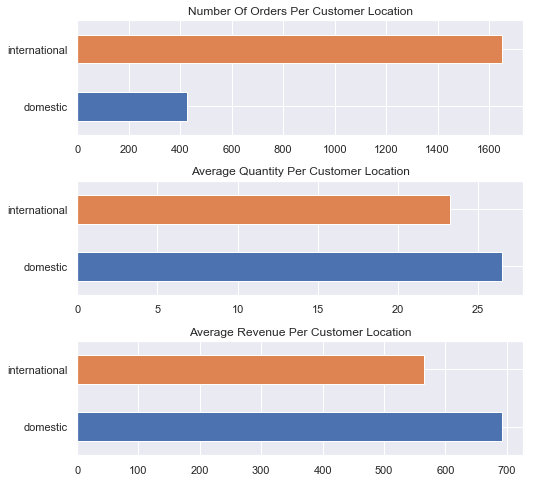

In [36]:
#plot the number of orders, average quantity and average revenue per order based on customer location
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8,8))
df3.groupby(['Location'])['Location'].count().plot(kind='barh', ax=ax1)
df3.groupby(['Location'])['Quantity'].mean().plot(kind='barh', ax=ax2)
df3.groupby(['Location'])['NetPrice'].mean().plot(kind='barh', ax=ax3)
ax1.set_title('Number Of Orders Per Customer Location')
ax1.set_ylabel('')
ax2.set_title('Average Quantity Per Customer Location')
ax2.set_ylabel('')
ax3.set_title('Average Revenue Per Customer Location')
ax3.set_ylabel('')
fig.subplots_adjust(hspace=0.4);

#### Observations:
* International customers make more orders than domestic customers.
* Domestic customers order a higher number of units.
* Domestic customers bring higher revenues.

Based on the observations, we'll split our dataframe into 2 on the basis of customer location to take a closer look at the data.

In [37]:
#create a dataframe for domestic customers and get the 5 point statistics
df3_domestic = df3.loc[df3['Location'] == 'domestic']
df3_domestic.describe()

,OrderID,UnitPrice,Quantity,Discount,GrossPrice,NetPrice
count,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000
mean,10683.918033,28.970515,26.496487,0.060281,746.840937,692.695317
std,243.226262,35.312703,22.584362,0.088043,1185.555900,1092.962510
min,10262.000000,2.000000,1.000000,0.000000,14.000000,14.000000
25%,10480.500000,12.500000,10.000000,0.000000,154.500000,147.900000
50%,10678.000000,19.200000,20.000000,0.000000,396.000000,379.950000
75%,10884.000000,34.800000,36.000000,0.100000,830.000000,775.737500
max,11077.000000,263.500000,120.000000,0.250000,10540.000000,10540.000000


In [38]:
#create a dataframe for international customers and get the 5 point statistics
df3_international = df3.loc[df3['Location'] == 'international']
df3_international.describe()

,OrderID,UnitPrice,Quantity,Discount,GrossPrice,NetPrice
count,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000,1651.000000
mean,10651.770442,25.580896,23.259237,0.054936,601.296160,564.624206
std,241.784191,28.386034,18.106604,0.082176,993.638608,941.184901
min,10248.000000,2.000000,1.000000,0.000000,4.800000,4.800000
25%,10446.000000,12.000000,10.000000,0.000000,155.000000,147.100000
50%,10648.000000,18.000000,20.000000,0.000000,360.000000,334.050000
75%,10857.500000,31.230000,30.000000,0.100000,695.500000,632.400000
max,11076.000000,263.500000,130.000000,0.250000,15810.000000,15810.000000


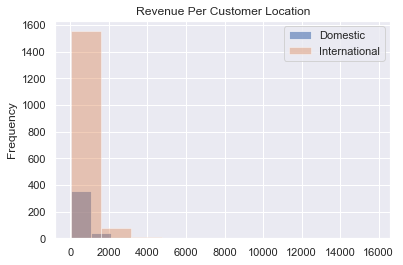

In [39]:
#plot net price by money spent based on customer location 
plt.figure(figsize=(6,4))
df3_domestic['NetPrice'].plot(kind='hist', alpha=0.6, legend=True, label='Domestic')
df3_international['NetPrice'].plot(kind='hist',  alpha=0.4, legend=True, label='International')
plt.title('Revenue Per Customer Location');

/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


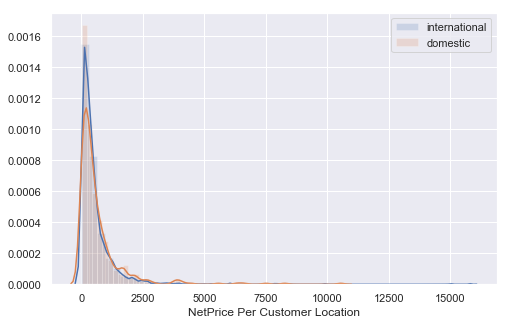

In [40]:
#plot the distributions 
plt.figure(figsize=(8,5))
for location in set(df3.Location):
    location_group = df3.loc[df3['Location'] == location]
    sns.distplot(location_group['NetPrice'], hist_kws=dict(alpha=0.2), label=location)
    plt.legend()
    plt.xlabel('NetPrice Per Customer Location')

#### 3. Hypothesis

> $H_{0}$: *There is no difference between the amount of revenue obtained from domestic and international customers.* 

> $H_{a}$: *Domestic customers bring more revenue to the company than international customers.*

> $\alpha$ *= 0.05*

#### 4. Statistical Analysis

As we are going to compare 2 gender groups to learn how they are different from each other, it is best to use a one sample t-test. Some assumptions of this test are that:
* data is independent, i.e. one observation does not influence or affect the other observations
* data is collected randomly, i.e. each data point has an equal chance of being included in the sample
* data is approximately normally distributed, i.e. the sampling distribution of the mean is normal

Although, there is skewness in our data, we'll proceed with the t-test, but we'll keep in mind that it delivers the most reliable results when performed on normally distributed data.

/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Null hypothesis rejected. Results are statistically significant with t-value = 2.42 critical t-value = 1.6484383884061835 and p-value = 0.0158792592


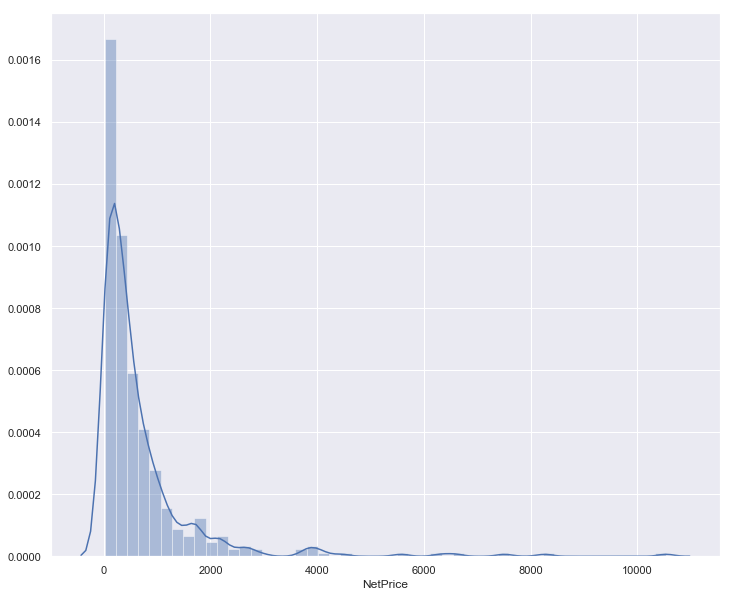

In [41]:
#run one-sample t-test
sample3 = df3_domestic.NetPrice
popmean3 = df3_international.NetPrice.mean()
alpha = 0.05
one_sample_ttest(sample3, popmean3, alpha)

We've proven that the alternative hypothesis is statistically significant, but now we need to understand the effect size, i.e. how different the sample means are. For this purpose, we'll use Cohen's D which defines the magnitude of differences between two or more groups on a given variable, and is calculated as 
> **$d$ = effect size (difference of means) / pooled standard deviation**

In [42]:
#find Cohen's D for our case
domestic_cust = df3_domestic.NetPrice
int_cust = df3_international.NetPrice
Cohen_d(domestic_cust, int_cust)

0.13144867560743662

Based on the results of Cohen's D, we conclude that the effect size is small.

#### 5. Conclusions

There is a difference between the shopping patterns of domestic and international customers. Although the effect size is small, we rejected the null hypothesis and proved that domestic customers spend more money on their orders. The company should focus on domestic customers because they also purchase more units per order than international customers.


### Test 4

#### 1. Question

Is it more profitable for the company to work with domestic or international suppliers?

#### 2. Initial Observations

In [43]:
#obtain the data needed to answer the question by joining Supplier, Product and OrderDetail tables
df4 = pd.read_sql_query('''SELECT s.ID AS SupplierID, s.Region, od.ID AS OrderID, od.UnitPrice, od.Quantity, od.Discount
                            FROM OrderDetail od
                            JOIN Product p ON od.ProductID = p.ID
                            JOIN Supplier s ON p.SupplierID = s.ID
                            ''', engine)
print('\nTable info')
df4.info()
print('\nSample data')
df4.head()

2019-07-22 00:49:13,697 INFO sqlalchemy.engine.base.Engine SELECT s.ID AS SupplierID, s.Region, od.ID AS OrderID, od.UnitPrice, od.Quantity, od.Discount
                            FROM OrderDetail od
                            JOIN Product p ON od.ProductID = p.ID
                            JOIN Supplier s ON p.SupplierID = s.ID
                            
2019-07-22 00:49:13,699 INFO sqlalchemy.engine.base.Engine ()

Table info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 6 columns):
SupplierID    2155 non-null int64
Region        2155 non-null object
OrderID       2155 non-null object
UnitPrice     2155 non-null float64
Quantity      2155 non-null int64
Discount      2155 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 101.1+ KB

Sample data


,SupplierID,Region,OrderID,UnitPrice,Quantity,Discount
0,5,Southern Europe,10248/11,14.0,12,0.0
1,20,South-East Asia,10248/42,9.8,10,0.0
2,14,Southern Europe,10248/72,34.8,5,0.0
3,6,Eastern Asia,10249/14,18.6,9,0.0
4,24,NSW,10249/51,42.4,40,0.0


In [44]:
#add a location column
domestic = ['North America']
df4['Location'] = np.where(df4['Region'].isin(domestic), 'domestic', 'international')
df4.head()

,SupplierID,Region,OrderID,UnitPrice,Quantity,Discount,Location
0,5,Southern Europe,10248/11,14.0,12,0.0,international
1,20,South-East Asia,10248/42,9.8,10,0.0,international
2,14,Southern Europe,10248/72,34.8,5,0.0,international
3,6,Eastern Asia,10249/14,18.6,9,0.0,international
4,24,NSW,10249/51,42.4,40,0.0,international


In [45]:
#add NetPrice column
df4['GrossPrice'] = np.multiply(df4['Quantity'],df4['UnitPrice'])
df4['NetPrice'] = np.multiply(df4['GrossPrice'],df4['Discount'])
df4['NetPrice'] = np.subtract(df4['GrossPrice'],df4['NetPrice'])
df4.head()

,SupplierID,Region,OrderID,UnitPrice,Quantity,Discount,Location,GrossPrice,NetPrice
0,5,Southern Europe,10248/11,14.0,12,0.0,international,168.0,168.0
1,20,South-East Asia,10248/42,9.8,10,0.0,international,98.0,98.0
2,14,Southern Europe,10248/72,34.8,5,0.0,international,174.0,174.0
3,6,Eastern Asia,10249/14,18.6,9,0.0,international,167.4,167.4
4,24,NSW,10249/51,42.4,40,0.0,international,1696.0,1696.0


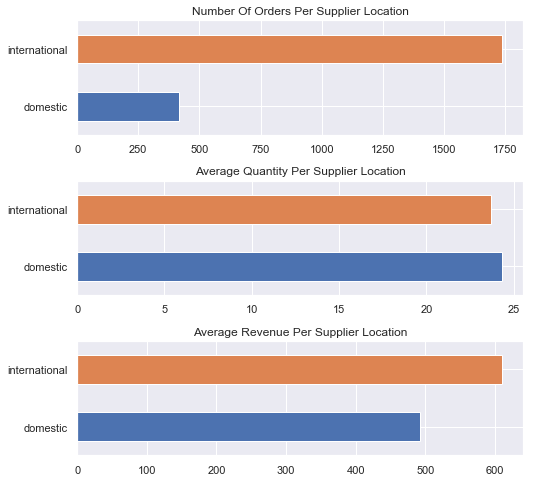

In [46]:
#plot the number of orders, average quantity and average revenue per order based on the supplier location
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8,8))
df4.groupby(['Location'])['Location'].count().plot(kind='barh', ax=ax1)
df4.groupby(['Location'])['Quantity'].mean().plot(kind='barh', ax=ax2)
df4.groupby(['Location'])['NetPrice'].mean().plot(kind='barh', ax=ax3)
ax1.set_title('Number Of Orders Per Supplier Location')
ax1.set_ylabel('')
ax2.set_title('Average Quantity Per Supplier Location')
ax2.set_ylabel('')
ax3.set_title('Average Revenue Per Supplier Location')
ax3.set_ylabel('')
fig.subplots_adjust(hspace=0.4);

#### Observations:
* More orders are made from the international suppliers than the domestic suppliers.
* Domestic and international suppliers have about the same unit quantity per order.
* Domestic suppliers bring higher revenues.

Based on the observations, we'll split our dataframe into 2 on the basis of supplier location to take a closer look at the data.

In [47]:
#create a dataframe for domestic suppliers and get the 5 point statistics
df4_domestic = df4.loc[df4['Location'] == 'domestic']
df4_domestic.describe()

,SupplierID,UnitPrice,Quantity,Discount,GrossPrice,NetPrice
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,16.332536,21.549163,24.334928,0.054474,525.702990,492.453762
std,9.957798,11.730271,20.791941,0.080727,558.657088,519.401574
min,2.000000,5.900000,1.000000,0.000000,17.000000,17.000000
25%,3.000000,14.000000,10.000000,0.000000,147.225000,144.000000
50%,19.000000,18.400000,20.000000,0.000000,356.000000,341.000000
75%,25.000000,28.500000,30.000000,0.100000,655.125000,609.000000
max,29.000000,49.300000,120.000000,0.250000,3944.000000,3352.400000


In [48]:
#create a dataframe for international customers and get the 5 point statistics
df4_international = df4.loc[df4['Location'] == 'international']
df4_international.describe()

,SupplierID,UnitPrice,Quantity,Discount,GrossPrice,NetPrice
count,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000,1737.000000
mean,14.044329,27.342176,23.687392,0.056575,653.261220,610.217252
std,7.692820,32.624045,18.575218,0.084110,1120.179735,1047.898992
min,1.000000,2.000000,1.000000,0.000000,4.800000,4.800000
25%,8.000000,12.000000,10.000000,0.000000,156.000000,150.000000
50%,12.000000,18.000000,20.000000,0.000000,360.000000,337.284000
75%,20.000000,33.250000,30.000000,0.100000,735.000000,665.000000
max,28.000000,263.500000,130.000000,0.250000,15810.000000,15810.000000


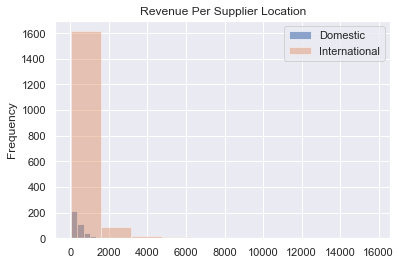

In [49]:
#plot the distributions
plt.figure(figsize=(6,4))
df4_domestic['NetPrice'].plot(kind='hist', alpha=0.6, legend=True, label='Domestic')
df4_international['NetPrice'].plot(kind='hist',  alpha=0.4, legend=True, label='International')
plt.title('Revenue Per Supplier Location');

/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


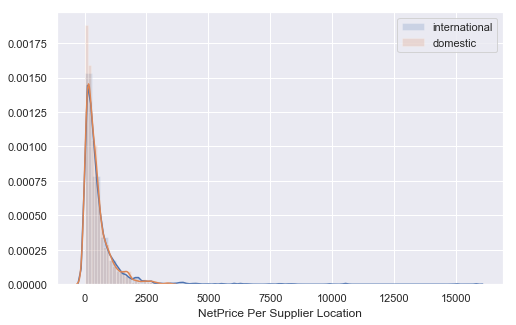

In [50]:
#plot the distributions 
plt.figure(figsize=(8,5))
for location in set(df4.Location):
    location_group = df4.loc[df4['Location'] == location]
    sns.distplot(location_group['NetPrice'], hist_kws=dict(alpha=0.2), label=location)
    plt.legend()
    plt.xlabel('NetPrice Per Supplier Location')

#### 3. Hypothesis

> $H_{0}$: *There is no difference in profitability between domestic and international suppliers.* 

> $H_{a}$: *Working with international suppliers is more profitable for the company than working with domestic suppliers.*

> $\alpha$ *= 0.05*

#### 4. Statistical Analysis

As we are going to compare 2 gender groups to learn how they are different from each other, it is best to use a one sample t-test. Some assumptions of this test are that:
* data is independent, i.e. one observation does not influence or affect the other observations
* data is collected randomly, i.e. each data point has an equal chance of being included in the sample
* data is approximately normally distributed, i.e. the sampling distribution of the mean is normal

Although, there is skewness in our data, we'll proceed with the t-test, but we'll keep in mind that it delivers the most reliable results when performed on normally distributed data.

/Users/algonzalez/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Null hypothesis rejected. Results are statistically significant with t-value = 4.68 critical t-value = 1.6457318455938168 and p-value = 3.0362e-06


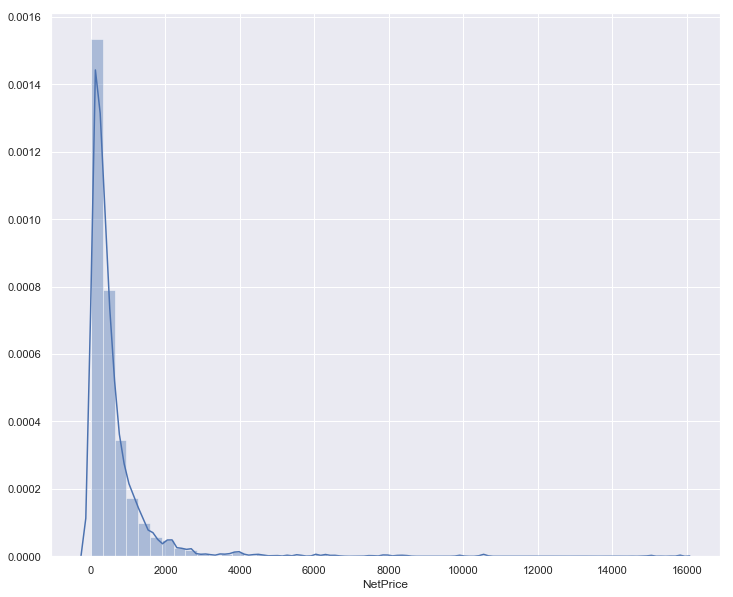

In [51]:
#run one-sample t-test
sample4 = df4_international.NetPrice
popmean4 = df4_domestic.NetPrice.mean()
alpha = 0.05
one_sample_ttest(sample4, popmean4, alpha)

We've proven that the alternative hypothesis is statistically significant, but now we need to understand the effect size, i.e. how different the sample means are. For this purpose, we'll use Cohen's D which defines the magnitude of differences between two or more groups on a given variable, and is calculated as 
> **$d$ = effect size (difference of means) / pooled standard deviation**

In [52]:
#find Cohen's D for our case
int_sup = df4_international.NetPrice
domestic_sup = df4_domestic.NetPrice
Cohen_d(int_sup, domestic_sup)

0.12163039532057317

Based on the results of Cohen's D, we conclude that the effect size is small.

#### 5. Conclusions

There is a difference between the profitability of domestic and international suppliers. Although the effect size is small, we rejected the null hypothesis and proved that more oders are made from international suppliers than from domestic suppliers. Although both domestic and international suppliers have about the same unit quantity per order, international suppliers have higher profitabiity. 


## Drawing Conclusions

In the 4 tests that we performed, we rejected the null hypotheses and proved the significance of discount, gender, customer location and supplier location on either the quantity of units ordered or on the company revenue. Although, in all 4 cases the effect size is small, our results are statistically significant.